<a href="https://colab.research.google.com/github/andreggalvao/Challenge-Data-Science-1ed/blob/main/Alura_Cash_Dados_Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Importando dados

In [2]:
LINK = 'https://raw.githubusercontent.com/andreggalvao/Challenge-Data-Science-1ed/main/Dados/dados_juntos_ANDRE.csv'
dados = pd.read_csv(LINK, sep = ',')
dados.head()

,person_id,loan_id,cb_id,person_id.1,person_age,person_income,person_home_ownership,person_emp_length,loan_id.1,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id.1,cb_person_default_on_file,cb_person_cred_hist_length
0,YIHuehGl-eWpc,IHcxHFyD-ddZE,CRO9thKh-NYDn,YIHuehGl-eWpc,29.0,175000.0,Mortgage,2.0,IHcxHFyD-ddZE,Homeimprovement,A,10000.0,NaN,0.0,0.06,CRO9thKh-NYDn,N,9.0
1,LmwskARR-HyA3,0YpSbTgj-CZKT,j3jnnG3T-iF3N,LmwskARR-HyA3,21.0,41900.0,Rent,2.0,0YpSbTgj-CZKT,Venture,C,16000.0,12.84,1.0,0.38,j3jnnG3T-iF3N,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,bRYeof0L-cqHI,30.0,100000.0,Rent,13.0,0T2YFLWb-IZze,Debtconsolidation,A,12000.0,7.88,0.0,0.12,0Y1a64ag-4RLW,N,9.0
3,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,F9a6bBd9-Xe2o,27.0,68000.0,Rent,4.0,8HuvzhAq-k7Xi,Homeimprovement,A,8700.0,7.88,0.0,0.13,L42AQtMx-SEGR,N,5.0
4,hBn6Nj78-fvgu,w1JRom7y-y1od,2SebLJsQ-lj5F,hBn6Nj78-fvgu,26.0,31200.0,Rent,8.0,w1JRom7y-y1od,Personal,A,5000.0,8.63,0.0,0.16,2SebLJsQ-lj5F,N,2.0


### Traduzindo e renomeando

In [3]:
dados.drop(columns = ['person_id.1', 'loan_id.1', 'cb_id.1'], inplace = True)
dados.rename(columns = {'person_id': 'id_pessoa',
                        'loan_id': 'id_emprestimo',
                        'cb_id': 'id_historico',
                        'person_age' : 'idade',
                        'person_income' : 'renda',
                        'person_home_ownership' : 'imovel',
                        'person_emp_length' : 'tempo_trabalhado',
                        'loan_intent': 'motivo_emprestimo',
                        'loan_grade' : 'nota_emprestimo',
                        'loan_amnt' : 'total_emprestado',
                        'loan_int_rate' : 'taxa_juros',
                        'loan_status' : 'inadimplencia',
                        'loan_percent_income' : 'renda_alocada',
                        'cb_person_default_on_file' : 'devedora',
                        'cb_person_cred_hist_length' : 'relacionamento_bancario'
                        }, inplace = True)

In [4]:
dados.imovel.value_counts()

Rent        17243
Mortgage    14100
Own          2717
Other         110
Name: imovel, dtype: int64

In [5]:
dados.replace({'Rent' : 'Alugado',
               'Mortgage' : 'Financiado',
               'Own' : 'Propria',
               'Other' : 'Outro'},
               inplace = True)

In [6]:
dados.motivo_emprestimo.value_counts()

Education            6774
Medical              6380
Venture              5977
Personal             5782
Debtconsolidation    5476
Homeimprovement      3797
Name: motivo_emprestimo, dtype: int64

In [7]:
dados.motivo_emprestimo.value_counts()

dados.replace({'Education' : 'Educacao',
               'Medical' : 'Medico',
               'Venture' : 'Empreendimento',
               'Personal' : 'Pessoal',
               'Debtconsolidation' : 'Dividas',
               'Homeimprovement' : 'Reforma'},
               inplace = True)


## Tratamento dos dados

*   Remoção dos nulos

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_pessoa                34485 non-null  object 
 1   id_emprestimo            34501 non-null  object 
 2   id_historico             34501 non-null  object 
 3   idade                    34177 non-null  float64
 4   renda                    34162 non-null  float64
 5   imovel                   34170 non-null  object 
 6   tempo_trabalhado         33247 non-null  float64
 7   motivo_emprestimo        34186 non-null  object 
 8   nota_emprestimo          34188 non-null  object 
 9   total_emprestado         34170 non-null  float64
 10  taxa_juros               30871 non-null  float64
 11  inadimplencia            34158 non-null  float64
 12  renda_alocada            34182 non-null  float64
 13  devedora                 34131 non-null  object 
 14  relacionamento_bancari

In [9]:
dados.isna().sum()

id_pessoa                    16
id_emprestimo                 0
id_historico                  0
idade                       324
renda                       339
imovel                      331
tempo_trabalhado           1254
motivo_emprestimo           315
nota_emprestimo             313
total_emprestado            331
taxa_juros                 3630
inadimplencia               343
renda_alocada               319
devedora                    370
relacionamento_bancario       4
dtype: int64

In [10]:
#removendo os NaN de ID
dados.dropna(subset = ['id_pessoa'], inplace = True)
# os IDs não me interessam uma vez que não vão me trazer informações para o modelo, todos seram removidos.
dados.drop(columns = ['id_pessoa', 'id_emprestimo', 'id_historico'], inplace = True)

In [11]:
# Aproveitando que os imoveis possuem uma categoria genérica como Outros, vamos utilizada para substituir os NaN.
values = {'imovel': 'Outro', }
#Deletaremos os NaN em seguida
dados.fillna(value=values, inplace = True)

In [12]:
# Os nulos da taxa_juros representam mais de 10% do dataset, vamos realizar algumas operações para "salvar" linhas
# A nota de um empréstimo está atrelada ao risco que é proporcionalmente a sua taxa de juros
# Com base nisso vamos estudar os juros baseado nas notas
taxa_juros_por_nota_mean = pd.crosstab(dados.nota_emprestimo,
                         dados.motivo_emprestimo,
                         aggfunc = ['mean'],
                         values = dados.taxa_juros)

taxa_juros_por_nota_mean.style.format('{:.2f}')



In [13]:
taxa_juros_por_nota_std = pd.crosstab(dados.nota_emprestimo,
                         dados.motivo_emprestimo,
                         aggfunc = ['std'],
                         values = dados.taxa_juros)

taxa_juros_por_nota_std.style.format('{:.2f}')



In [14]:
# os resultados nos mostram que há certo padrão de juros por nota e o desvio é pequeno.
# vamos verificar se a justificativa implica em mudança nos valores

dados.groupby(['motivo_emprestimo']).agg({'taxa_juros': ['mean', 'median', 'max', 'std']})


taxa_juros                        
                        mean median    max       std
motivo_emprestimo                                   
Dividas            10.984931  10.99  22.11  3.262148
Educacao           10.959092  10.99  21.74  3.190000
Empreendimento     10.954141  10.99  22.48  3.222571
Medico             11.053941  10.99  21.74  3.231814
Pessoal            10.986074  10.99  21.74  3.223122
Reforma            11.194842  11.14  23.22  3.352346

In [15]:
# Sendo as médias das justificativas muito próximas, vamos apenas substituir as taxa de Juros NaN com as notas dadas (caso possua)

dados.loc[(dados.nota_emprestimo == 'A') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[0]
dados.loc[(dados.nota_emprestimo == 'B') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[1]
dados.loc[(dados.nota_emprestimo == 'C') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[2]
dados.loc[(dados.nota_emprestimo == 'D') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[3]
dados.loc[(dados.nota_emprestimo == 'E') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[4]
dados.loc[(dados.nota_emprestimo == 'F') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[5]
dados.loc[(dados.nota_emprestimo == 'G') & (dados.taxa_juros.isna()), 'taxa_juros'] = taxa_juros_por_nota_mean.T.mean()[6]

In [16]:
dados.isna().sum()

idade                       320
renda                       335
imovel                        0
tempo_trabalhado           1254
motivo_emprestimo           311
nota_emprestimo             309
total_emprestado            331
taxa_juros                   61
inadimplencia               343
renda_alocada               315
devedora                    366
relacionamento_bancario       0
dtype: int64

In [17]:
# O percentual de renda alocada (renda_alocada) = renda / total_emprestado
# Com isso podemos reverter algumas linhas nulas
dados.loc[dados.renda_alocada.isna(), 'renda_alocada'] = (dados.total_emprestado / dados.renda).round(2) #corrigindo o renda alocada


In [18]:
# Para tratar o último caso de Nan com grande quantidade, vamos estimar o dado utilizando a média dos dados agrupados das outras idade

dados.tempo_trabalhado.fillna(dados.groupby(['idade', 'relacionamento_bancario'])['tempo_trabalhado'].transform('median'), inplace=True)

dados.isna().sum()


idade                      320
renda                      335
imovel                       0
tempo_trabalhado            73
motivo_emprestimo          311
nota_emprestimo            309
total_emprestado           331
taxa_juros                  61
inadimplencia              343
renda_alocada               56
devedora                   366
relacionamento_bancario      0
dtype: int64

In [19]:
# Por fim, vamos elimitar todos os NaN restantes

dados.dropna(inplace = True)


In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32833 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    32833 non-null  float64
 1   renda                    32833 non-null  float64
 2   imovel                   32833 non-null  object 
 3   tempo_trabalhado         32833 non-null  float64
 4   motivo_emprestimo        32833 non-null  object 
 5   nota_emprestimo          32833 non-null  object 
 6   total_emprestado         32833 non-null  float64
 7   taxa_juros               32833 non-null  float64
 8   inadimplencia            32833 non-null  float64
 9   renda_alocada            32833 non-null  float64
 10  devedora                 32833 non-null  object 
 11  relacionamento_bancario  32833 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.3+ MB



*   Remoção de outliers




In [21]:
dados.describe()

,idade,renda,tempo_trabalhado,total_emprestado,taxa_juros,inadimplencia,renda_alocada,relacionamento_bancario
count,32833.000000,3.283300e+04,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,27.729084,6.608998e+04,4.768221,9590.750921,11.007128,0.217891,0.170377,5.802668
std,6.336082,6.194740e+04,4.084003,6321.679084,3.210405,0.412819,0.107263,4.052840
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.384884,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,1.130000,30.000000


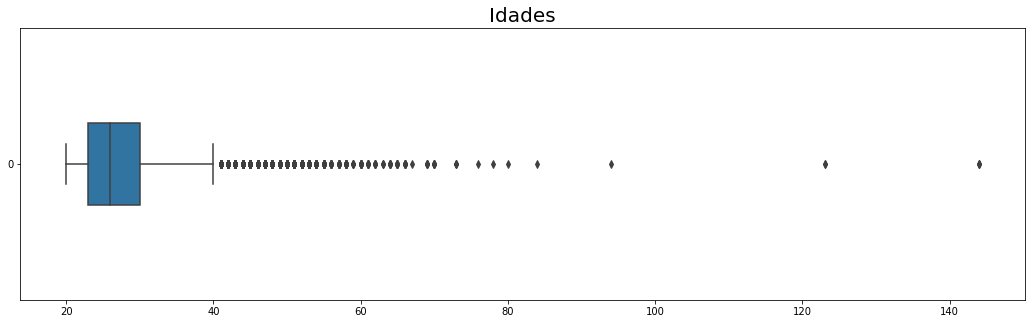

In [22]:
ax = sns.boxplot(data = dados.idade, orient = 'h', width = 0.3)
ax.figure.set_size_inches(18, 5)
ax.set_title('Idades', fontsize=20)
ax

In [23]:
#A busca nos mostrou idades ireais, podemos encarar como um erro de digitação e será deletado
dados.drop(index = dados.query('idade > 100').index, inplace = True)

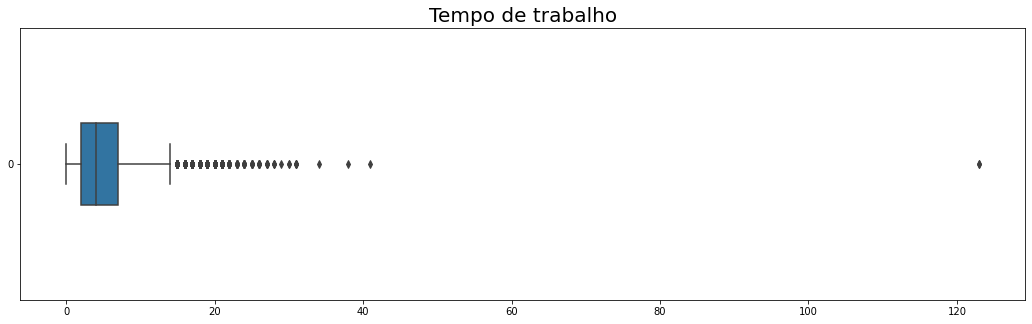

In [24]:
ax = sns.boxplot(data = dados.tempo_trabalhado, orient = 'h', width = 0.3)
ax.figure.set_size_inches(18, 5)
ax.set_title('Tempo de trabalho', fontsize=20)
ax

In [25]:
#A busca nos mostrou tempos de trabalho ireais, podemos encarar como um erro de digitação e será deletado
dados.drop(index = dados.query('tempo_trabalhado > 100').index, inplace = True)

In [26]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,32826.0,27.713032,6.193810,20.00,23.00,26.00,30.000000,94.00
renda,32826.0,65895.118290,52568.924131,4000.00,38500.00,55000.00,79200.000000,2039784.00
tempo_trabalhado,32826.0,4.760860,3.978550,0.00,2.00,4.00,7.000000,41.00
total_emprestado,32826.0,9589.408548,6319.856230,500.00,5000.00,8000.00,12200.000000,35000.00
taxa_juros,32826.0,11.006978,3.210482,5.42,7.88,10.99,13.384884,23.22
inadimplencia,32826.0,0.217907,0.412830,0.00,0.00,0.00,0.000000,1.00
renda_alocada,32826.0,0.170376,0.107236,0.00,0.09,0.15,0.230000,1.13
relacionamento_bancario,32826.0,5.802565,4.051720,2.00,3.00,4.00,8.000000,30.00


* Correlação

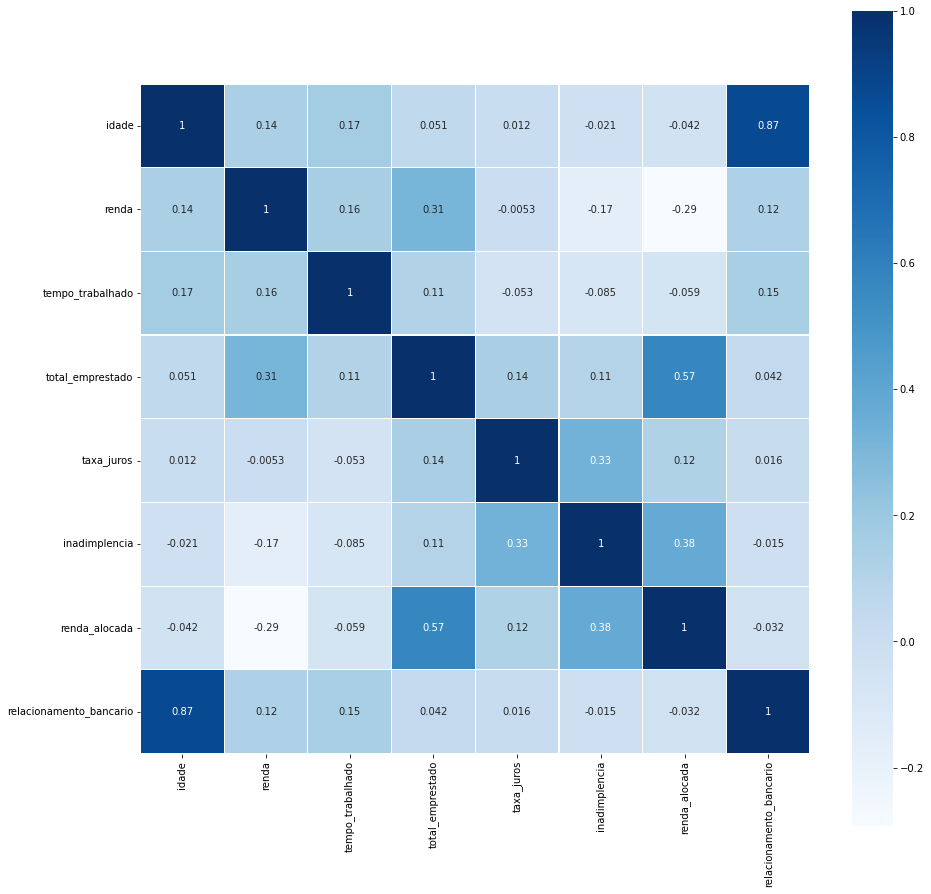

In [27]:
corr = dados.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square = True, annot = True, cmap = 'Blues', linewidths = 0.25)



### Encoding das variáveis categóricas


In [28]:
dados.columns

Index(['idade', 'renda', 'imovel', 'tempo_trabalhado', 'motivo_emprestimo',
       'nota_emprestimo', 'total_emprestado', 'taxa_juros', 'inadimplencia',
       'renda_alocada', 'devedora', 'relacionamento_bancario'],
      dtype='object')

In [29]:
dados[['imovel', 'motivo_emprestimo', 'nota_emprestimo', 'devedora']]

,imovel,motivo_emprestimo,nota_emprestimo,devedora
0,Financiado,Reforma,A,N
1,Alugado,Empreendimento,C,Y
2,Alugado,Dividas,A,N
3,Alugado,Reforma,A,N
4,Alugado,Pessoal,A,N
...,...,...,...,...
34496,Alugado,Medico,B,N
34497,Alugado,Dividas,D,Y
34498,Propria,Empreendimento,C,Y
34499,Alugado,Medico,B,N


In [30]:
dicionario = {
    #substituindo os dados da devedora
    'N': 0,
    'Y': 1,

    #substituindo as notas dos empréstimos
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

#optei por utilizar label encoding nas notas dos empréstimos pois possuem uma relação hierarquica.

dados.replace(dicionario, inplace = True)
dados.head()

,idade,renda,imovel,tempo_trabalhado,motivo_emprestimo,nota_emprestimo,total_emprestado,taxa_juros,inadimplencia,renda_alocada,devedora,relacionamento_bancario
0,29.0,175000.0,Financiado,2.0,Reforma,0,10000.0,7.422942,0.0,0.06,0,9.0
1,21.0,41900.0,Alugado,2.0,Empreendimento,2,16000.0,12.840000,1.0,0.38,1,2.0
2,30.0,100000.0,Alugado,13.0,Dividas,0,12000.0,7.880000,0.0,0.12,0,9.0
3,27.0,68000.0,Alugado,4.0,Reforma,0,8700.0,7.880000,0.0,0.13,0,5.0
4,26.0,31200.0,Alugado,8.0,Pessoal,0,5000.0,8.630000,0.0,0.16,0,2.0


In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas = ['imovel', 'motivo_emprestimo']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(), colunas),
    remainder='passthrough')

dados_final = one_hot_enc.fit_transform(dados)
dados_final = pd.DataFrame(dados_final, columns=one_hot_enc.get_feature_names_out())
dados_final.head()

,onehotencoder__imovel_Alugado,onehotencoder__imovel_Financiado,onehotencoder__imovel_Outro,onehotencoder__imovel_Propria,onehotencoder__motivo_emprestimo_Dividas,onehotencoder__motivo_emprestimo_Educacao,onehotencoder__motivo_emprestimo_Empreendimento,onehotencoder__motivo_emprestimo_Medico,onehotencoder__motivo_emprestimo_Pessoal,onehotencoder__motivo_emprestimo_Reforma,remainder__idade,remainder__renda,remainder__tempo_trabalhado,remainder__nota_emprestimo,remainder__total_emprestado,remainder__taxa_juros,remainder__inadimplencia,remainder__renda_alocada,remainder__devedora,remainder__relacionamento_bancario
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,175000.0,2.0,0.0,10000.0,7.422942,0.0,0.06,0.0,9.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,41900.0,2.0,2.0,16000.0,12.840000,1.0,0.38,1.0,2.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,100000.0,13.0,0.0,12000.0,7.880000,0.0,0.12,0.0,9.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,68000.0,4.0,0.0,8700.0,7.880000,0.0,0.13,0.0,5.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,31200.0,8.0,0.0,5000.0,8.630000,0.0,0.16,0.0,2.0


### Normalização


In [32]:
# Realizando a divisão dos dados
x = dados_final.drop(columns = 'remainder__inadimplencia')
y = dados_final['remainder__inadimplencia']

In [33]:
#Normalização dos dados.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns = x.columns)
X

,onehotencoder__imovel_Alugado,onehotencoder__imovel_Financiado,onehotencoder__imovel_Outro,onehotencoder__imovel_Propria,onehotencoder__motivo_emprestimo_Dividas,onehotencoder__motivo_emprestimo_Educacao,onehotencoder__motivo_emprestimo_Empreendimento,onehotencoder__motivo_emprestimo_Medico,onehotencoder__motivo_emprestimo_Pessoal,onehotencoder__motivo_emprestimo_Reforma,remainder__idade,remainder__renda,remainder__tempo_trabalhado,remainder__nota_emprestimo,remainder__total_emprestado,remainder__taxa_juros,remainder__renda_alocada,remainder__devedora,remainder__relacionamento_bancario
0,-1.005805,1.196777,-0.083262,-0.293044,-0.436131,-0.496990,-0.461462,-0.478853,-0.451425,2.833820,0.207786,2.075495,-0.693947,-1.043796,0.064969,-1.116372,-1.029291,-0.462191,0.789167
1,0.994229,-0.835577,-0.083262,-0.293044,-0.436131,-0.496990,2.167024,-0.478853,-0.451425,-0.352881,-1.083846,-0.456458,-0.693947,0.671574,1.014373,0.570958,1.954819,2.163609,-0.938521
2,0.994229,-0.835577,-0.083262,-0.293044,2.292889,-0.496990,-0.461462,-0.478853,-0.451425,-0.352881,0.369240,0.648775,2.070922,-1.043796,0.381437,-0.974005,-0.469770,-0.462191,0.789167
3,0.994229,-0.835577,-0.083262,-0.293044,-0.436131,-0.496990,-0.461462,-0.478853,-0.451425,2.833820,-0.115122,0.040041,-0.191244,-1.043796,-0.140735,-0.974005,-0.376517,-0.462191,-0.198083
4,0.994229,-0.835577,-0.083262,-0.293044,-0.436131,-0.496990,-0.461462,-0.478853,2.215207,-0.352881,-0.276576,-0.660003,0.814163,-1.043796,-0.726200,-0.740392,-0.096756,-0.462191,-0.938521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32821,0.994229,-0.835577,-0.083262,-0.293044,-0.436131,-0.496990,-0.461462,2.088324,-0.451425,-0.352881,-0.115122,-0.359441,1.568218,-0.186111,-1.311665,-0.170375,-1.309051,-0.462191,0.542354
32822,0.994229,-0.835577,-0.083262,-0.293044,2.292889,-0.496990,-0.461462,-0.478853,-0.451425,-0.352881,6.827399,-0.682831,-1.196650,1.529259,-1.359135,2.019360,-1.309051,2.163609,3.750917
32823,-1.005805,-0.835577,-0.083262,3.412453,-0.436131,-0.496990,2.167024,-0.478853,-0.451425,-0.352881,-0.599484,-0.416509,1.065515,0.671574,-0.567966,1.542789,-0.283263,2.163609,-0.444896
32824,0.994229,-0.835577,-0.083262,-0.293044,-0.436131,-0.496990,-0.461462,2.088324,-0.451425,-0.352881,-0.760938,-0.017028,0.562812,-0.186111,-0.947727,-0.129882,-1.029291,-0.462191,-0.691708


In [34]:
#Vamos agora realizar o balanceamento da variável alvo.

nao_devedora = y.value_counts()[0] # Não devedora
devedora = y.value_counts()[1] # Não devedora
total = y.count()

print('O dataset contêm um total de %d linhas'% total)
print('Onde %d linhas são de clientes não inadimplentes e corresponde a %.2f%% dos dados.' %(nao_devedora, (nao_devedora/total)*100))
print('Enquanto %d linhas são clientes inadimplentes, correspondendo a %.2f%% dos dados.' %(devedora,(devedora/total)*100))

O dataset contêm um total de 32826 linhas
Onde 25673 linhas são de clientes não inadimplentes e corresponde a 78.21% dos dados.
Enquanto 7153 linhas são clientes inadimplentes, correspondendo a 21.79% dos dados.


Devido ao desbalanceamento será necessário uma técnica de oversampling para equlibrar

In [35]:

# Realizando o import do Smote
from imblearn.over_sampling import SMOTE

# Instanciando um objeto Smote()
smt = SMOTE()
# Aplicando o Resample das classes
X,y = smt.fit_resample(X,y)

# Visualizando a nova distribuição das classes
y.value_counts()

0.0    25673
1.0    25673
Name: remainder__inadimplencia, dtype: int64

## Aprendizado

Definindo a funçao básica para chamar os diversos modelos

In [49]:
# Importando os modelos 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Importando as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

  # SEED
SEED = 10

# separando os dados
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size=0.30, random_state = SEED, stratify = y)

In [37]:
# def roda_tudo(classificador, X, y):

  
#   # classificador
#   modelo = classificador
#   modelo.fit(treino_X, treino_y)

#   # Predição 
#   previsoes = modelo.predict(teste_X)

#   # Métricas
#   acuracia = accuracy_score(teste_y, previsoes)*100
#   precisao = precision_score(teste_y, previsoes)*100
#   recall = recall_score(teste_y, previsoes)*100
#   f1 = f1_score(teste_y, previsoes)*100
    
#   print('A acurácia do modelo foi de %.2f%%' %acuracia)
#   print('A precisão do modelo foi de %.2f%%'%precisao)
#   print('A taxa de recall do modelo foi de %.2f%%'% recall)
#   print('A taxa de balanceamento do modelo foi de %.2f%%'%f1)
    
#   mc = confusion_matrix(teste_y, previsoes)
#   display = ConfusionMatrixDisplay(confusion_matrix = mc)
#   display.plot()

#   print(100*'-')
#   prob_previsao = modelo.predict_proba(teste_X)[:,1]
   
#   tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
#   print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
#   plt.subplots(1, figsize=(5,5))
#   plt.title('Curva ROC')
#   plt.plot(tfp, tvp)
#   plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
#   plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
#   plt.ylabel('Sensibilidade')
#   plt.xlabel('Especificidade')
#   plt.show()



In [ ]:
dummy = DummyClassifier(random_state=SEED)
dummy.fit(treino_X, treino_y)
previsao_dummy = dummy.predict(teste_X)

In [37]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(treino_X, treino_y)
previsao_arvore = arvore.predict(teste_X)

In [ ]:
floresta = RandomForestClassifier(random_state=SEED)
floresta.fit(treino_X, treino_y)
previsao_floresta = floresta.predict(teste_X)

In [ ]:
gboost = GradientBoostingClassifier(random_state=SEED)
gboost.fit(treino_X, treino_y)
previsao_gboost = gboost.predict(teste_X)

In [ ]:
logreg = LogisticRegression(random_state=SEED)
logreg.fit(treino_X, treino_y)
previsao_logreg = logreg.predict(teste_X)

In [ ]:
from sklearn.metrics import recall_score
metricas_over = pd.DataFrame({'Acurácia treino':[arvore.score(treino_X, treino_y), 
                                 gboost.score(treino_X, treino_y), 
                                 logreg.score(treino_X, treino_y),
                                 dummy.score(treino_X, treino_y)], 
                              
            'Acurácia teste': [arvore.score(teste_X, teste_y), 
                                 gboost.score(teste_X, teste_y), 
                                 logreg.score(teste_X, teste_y),
                               dummy.score(teste_X, treino_y)],
                               
            'Recall':[recall_score(teste_y, previsao_arvore),
                      recall_score(teste_y, previsao_gboost),
                      recall_score(teste_y, logreg),
                      recall_score(teste_y, dummy)]
                      },
             index = ['Árvore de Decisão', 'Gradient Boosting', 'Regressão Logísitica', 'DummyClassifier'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A acurácia do modelo foi de 50.00%
A precisão do modelo foi de 0.00%
A taxa de recall do modelo foi de 0.00%
A taxa de balanceamento do modelo foi de 0.00%
----------------------------------------------------------------------------------------------------
roc_auc: 0.5


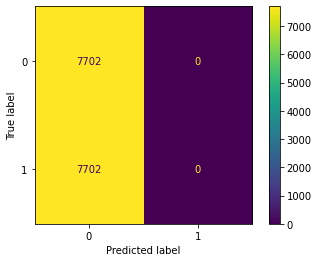

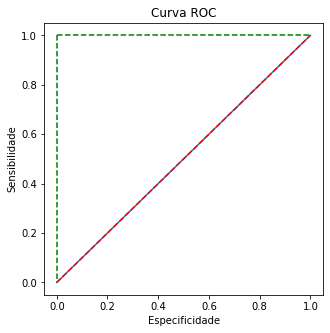

In [38]:
roda_tudo(DummyClassifier(), X, y)

A acurácia do modelo foi de 89.78%
A precisão do modelo foi de 89.18%
A taxa de recall do modelo foi de 90.55%
A taxa de balanceamento do modelo foi de 89.86%
----------------------------------------------------------------------------------------------------
roc_auc: 0.8978187483770449


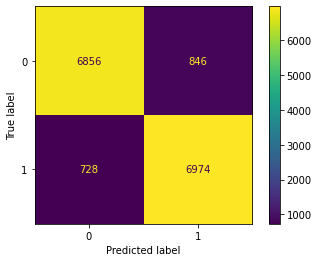

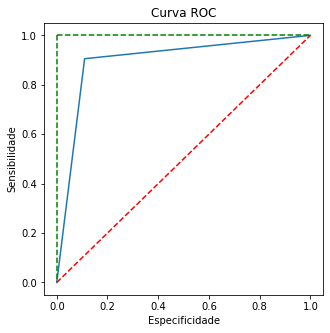

In [39]:
roda_tudo(DecisionTreeClassifier(random_state = SEED), X, y)

A acurácia do modelo foi de 94.19%
A precisão do modelo foi de 97.74%
A taxa de recall do modelo foi de 90.47%
A taxa de balanceamento do modelo foi de 93.97%
----------------------------------------------------------------------------------------------------
roc_auc: 0.9854942036861133


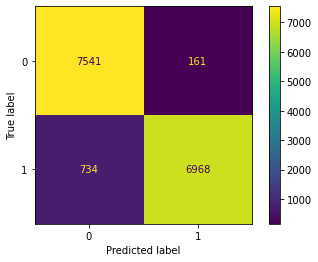

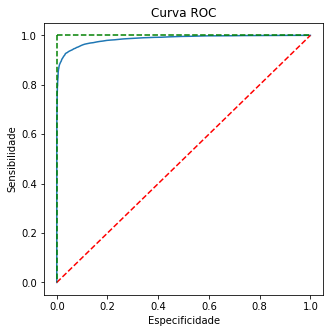

In [40]:
roda_tudo(RandomForestClassifier(random_state = SEED), X, y)

A acurácia do modelo foi de 90.17%
A precisão do modelo foi de 93.89%
A taxa de recall do modelo foi de 85.94%
A taxa de balanceamento do modelo foi de 89.74%
----------------------------------------------------------------------------------------------------
roc_auc: 0.9631998328950498


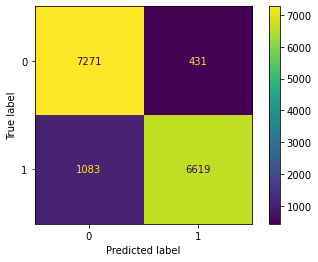

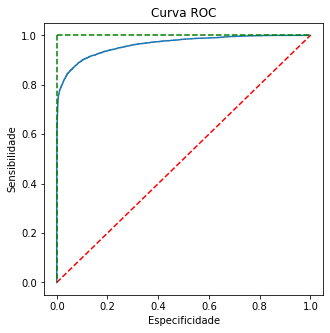

In [41]:
roda_tudo(GradientBoostingClassifier(random_state = SEED), X, y)

A acurácia do modelo foi de 78.50%
A precisão do modelo foi de 79.00%
A taxa de recall do modelo foi de 77.63%
A taxa de balanceamento do modelo foi de 78.31%
----------------------------------------------------------------------------------------------------
roc_auc: 0.8632273089218413


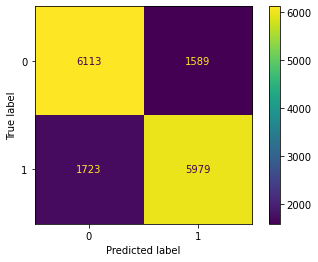

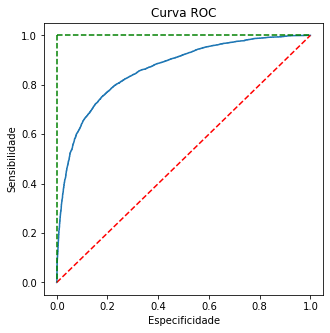

In [42]:
roda_tudo(LogisticRegression(random_state = SEED), X, y)

O problema do banco está relacionado a questão da inadimplencia, nosso modelo deve focar em ser capaz de diferenciar ambas categorias com maior eficácia possível.

Dessa forma vamos escolher os dois melhores modelos, RandomForestClassifier e o GradientBoostingClassifier, e buscar sua otimização.

## Otimizando os modelos

In [43]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [44]:
parametros = { 'n_estimators' : [100, 500],
              'criterion' : ['gini','entropy'],
              'max_depth' : [4, 64, 'log-uniform'],
              'min_samples_split' : [4, 120],
              'min_samples_leaf' : [2, 120]}

grid_search = GridSearchCV(RandomForestClassifier(random_state = SEED), parametros,scoring='recall',cv=3,verbose = 1)

grid_search.fit(treino_X, treino_y)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 64, 'log-uniform'],
                         'min_samples_leaf': [2, 120],
                         'min_samples_split': [4, 120],
                         'n_estimators': [100, 500]},
             scoring='recall', verbose=1)

In [ ]:
parameters = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "absolute_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9],
    "n_estimators":[10,100]
    }

grid_search_GBossting = GridSearchCV(GradientBoostingClassifier(random_state = SEED), parameters,scoring='recall',cv=3,verbose = 1)

grid_search_GBossting.fit(treino_X, treino_y)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  FutureWarning,
/usr/local/lib/p

In [47]:
previsao_grid_search = grid_search.best_estimator_
previsao_grid = previsao_grid_search.predict(teste_X)
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=64, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=500, random_state=10)

In [50]:
print(classification_report(teste_y, previsao_grid))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7702
         1.0       0.98      0.89      0.93      7702

    accuracy                           0.94     15404
   macro avg       0.94      0.94      0.94     15404
weighted avg       0.94      0.94      0.94     15404



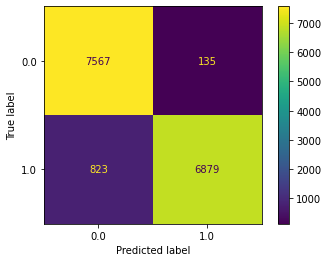

In [52]:
ConfusionMatrixDisplay.from_estimator(previsao_grid_search, teste_X, teste_y)
plt.grid(False)
plt.show()

In [ ]:
previsao_grid_search = grid_search_GBossting.best_estimator_
previsao_grid = previsao_grid_search.predict(teste_X)
grid_search_GBossting.best_estimator_

In [ ]:
ConfusionMatrixDisplay.from_estimator(previsao_grid_search, teste_X, teste_y)
plt.grid(False)
plt.show()